<a href="https://colab.research.google.com/github/Shoaib003/UK-Clothing-Retail-Sales-Profitability-Analysis/blob/main/UK_clothing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sales Performance & Profitability Analysis for a UK Clothing Retail Company

### Python EDA

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_uk_clothing = pd.read_excel('uk_clothing_sql_.xlsx')

In [10]:
df_uk_clothing.head()

,channel,city,region,customer_name,order_date,order_id,department,product_category_gender,product_sub_category,product_sku,product_name,distance_from_warehouse,price,cost_of_sale,discount,order_quantity,sales,gross_profit,gross_profit_margin
0,Small chain store,St. Stephens Ward,Kent,Alan D Rosenburg Cpa Pc,2017-12-30,28774,Clothing,Men,Hoodies & Sweatshirts,MH01,Chaz Kangeroo Hoodie,40,34,576.6,0.1,32,1088,511.4,U
1,Supermarket,Abbey Ward,Buckinghamshire,Cap Gemini America,2017-12-30,13729,Clothing,Men,Hoodies & Sweatshirts,MH01-L-Black,Chaz Kangeroo Hoodie-L-Black,160,37,109.9,0.1,9,333,223.1,0.66997
2,Local store,East Southbourne and Tuckton W,Bournemouth,"Elliott, John W Esq",2017-12-31,37537,Clothing,Men,Hoodies & Sweatshirts,MH01-L-Gray,Chaz Kangeroo Hoodie-L-Gray,20,41,41.0,0.0,4,164,123.0,0.75
3,Local store,Hawerby cum Beesby,Lincolnshire,"Mcmahan, Ben L",2017-12-31,37537,Clothing,Men,Hoodies & Sweatshirts,MH01-L-Orange,Chaz Kangeroo Hoodie-L-Orange,40,30,470.4,0.1,32,960,489.6,0.51
4,Franchise,Greets Green and Lyng Ward,West Midlands,Champagne Room,2017-12-31,44069,Clothing,Men,Hoodies & Sweatshirts,MH01-M-Black,Chaz Kangeroo Hoodie-M-Black,65,25,104.0,0.1,16,400,296.0,0.74


### Exploratory Analysis

In [12]:
df_uk_clothing.isna().sum()

,0
channel,0
city,0
region,0
customer_name,0
order_date,0
order_id,0
department,0
product_category_gender,0
product_sub_category,0
product_sku,0


In [16]:
df_uk_clothing[['distance_from_warehouse', 'price', 'cost_of_sale', 'discount', 'order_quantity', 'sales', 'gross_profit']].describe()

,distance_from_warehouse,price,cost_of_sale,discount,order_quantity,sales,gross_profit
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,98.474818,32.945589,388.934314,0.053911,25.571735,844.168949,455.234635
std,63.226735,14.065712,321.472331,0.049993,14.481071,633.832855,365.362617
min,5.000000,5.000000,2.200000,0.000000,1.000000,5.000000,1.600000
25%,40.000000,22.000000,141.650000,0.000000,13.000000,324.000000,167.000000
50%,70.000000,32.000000,307.200000,0.100000,26.000000,714.000000,369.600000
75%,160.000000,43.000000,550.600000,0.100000,38.000000,1221.000000,652.800000
max,205.000000,65.000000,1966.100000,0.300000,50.000000,3250.000000,2405.000000


### Sales by Region

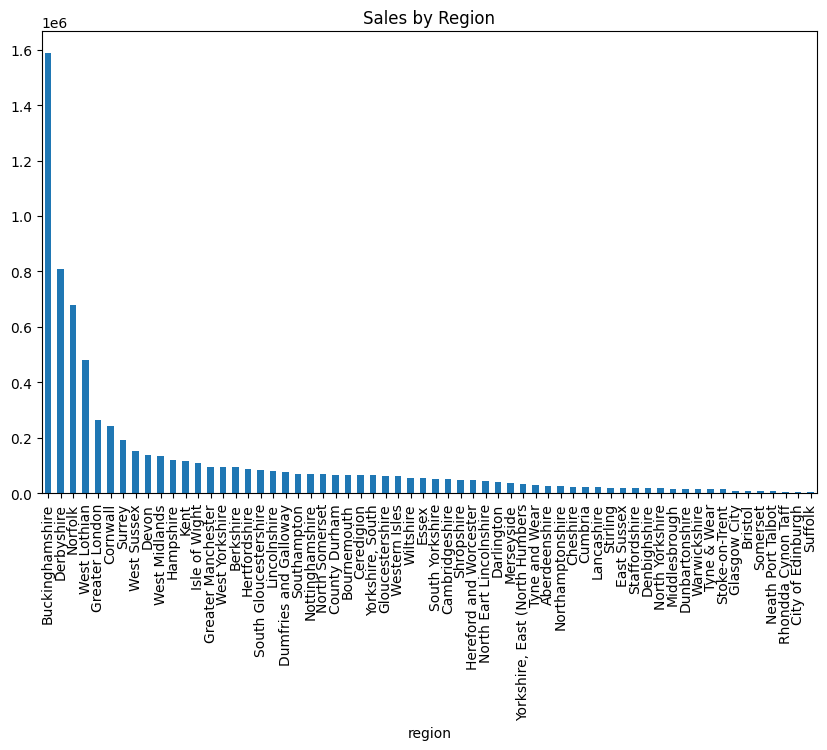

In [35]:
plt.figure(figsize=(10, 6))
df_uk_clothing.groupby('region')['sales'].sum().sort_values(ascending=False).plot(kind='bar')

plt.title("Sales by Region")
plt.show()

### Profit by Channel

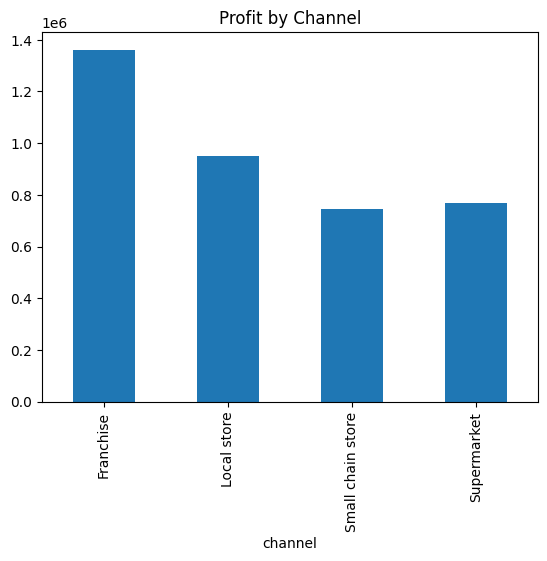

In [26]:
df_uk_clothing.groupby('channel')['gross_profit'].sum().plot(kind='bar')
plt.title('Profit by Channel')
plt.show()

### Discount vs Profit

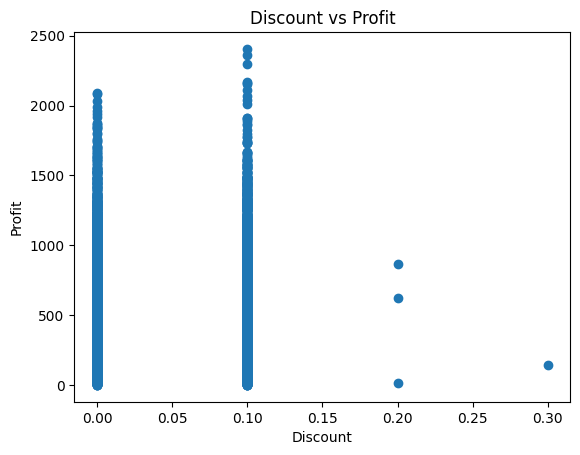

In [27]:
plt.scatter(df_uk_clothing['discount'], df_uk_clothing['gross_profit'])
plt.xlabel("Discount")
plt.ylabel('Profit')
plt.title("Discount vs Profit")
plt.show()

### Correlation Heatmap

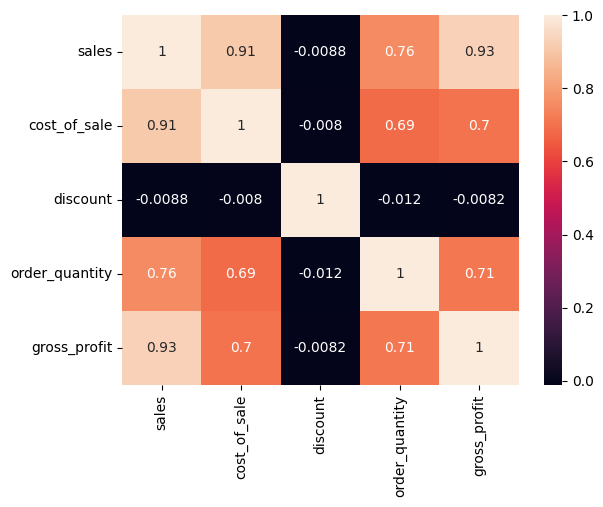

In [29]:
sns.heatmap(df_uk_clothing[['sales', 'cost_of_sale', 'discount', 'order_quantity', 'gross_profit']]
            .corr(), annot=True)
plt.show()

## SQL Queries

In [46]:
import sqlite3

# create an in memory SQLite database connection
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

df_uk_clothing.to_sql("UK_clothing", conn, if_exists='replace', index=False)

8399

In [48]:
query = """
SELECT * FROM UK_clothing LIMIT 5; """
pd.read_sql(query, conn)

,channel,city,region,customer_name,order_date,order_id,department,product_category_gender,product_sub_category,product_sku,product_name,distance_from_warehouse,price,cost_of_sale,discount,order_quantity,sales,gross_profit,gross_profit_margin
0,Small chain store,St. Stephens Ward,Kent,Alan D Rosenburg Cpa Pc,2017-12-30 00:00:00,28774,Clothing,Men,Hoodies & Sweatshirts,MH01,Chaz Kangeroo Hoodie,40,34,576.6,0.1,32,1088,511.4,U
1,Supermarket,Abbey Ward,Buckinghamshire,Cap Gemini America,2017-12-30 00:00:00,13729,Clothing,Men,Hoodies & Sweatshirts,MH01-L-Black,Chaz Kangeroo Hoodie-L-Black,160,37,109.9,0.1,9,333,223.1,0.66996996996997
2,Local store,East Southbourne and Tuckton W,Bournemouth,"Elliott, John W Esq",2017-12-31 00:00:00,37537,Clothing,Men,Hoodies & Sweatshirts,MH01-L-Gray,Chaz Kangeroo Hoodie-L-Gray,20,41,41.0,0.0,4,164,123.0,0.75
3,Local store,Hawerby cum Beesby,Lincolnshire,"Mcmahan, Ben L",2017-12-31 00:00:00,37537,Clothing,Men,Hoodies & Sweatshirts,MH01-L-Orange,Chaz Kangeroo Hoodie-L-Orange,40,30,470.4,0.1,32,960,489.6,0.51
4,Franchise,Greets Green and Lyng Ward,West Midlands,Champagne Room,2017-12-31 00:00:00,44069,Clothing,Men,Hoodies & Sweatshirts,MH01-M-Black,Chaz Kangeroo Hoodie-M-Black,65,25,104.0,0.1,16,400,296.0,0.74


### Total Sales and Profit

In [49]:
total_sales_and_profit = """

SELECT
    SUM(sales) AS total_sales,
    SUM(sales - cost_of_sale) AS total_profit
FROM UK_clothing;
"""
pd.read_sql(total_sales_and_profit, conn)

,total_sales,total_profit
0,7090175,3823515.7


### Sales by Region

In [51]:
sales_by_region = """

SELECT region, SUM(sales) AS total_sales
FROM UK_clothing
GROUP BY region
ORDER BY total_sales DESC;

"""
pd.read_sql(sales_by_region, conn)

,region,total_sales
0,Buckinghamshire,1586486
1,Derbyshire,807228
2,Norfolk,679339
3,West Lothian,481313
4,Greater London,264273
...,...,...
57,Somerset,8397
58,Neath Port Talbot,7440
59,Rhondda Cynon Taff,6221
60,City of Edinburgh,5112


### Profit by Region

In [52]:
profit_by_region = """

SELECT region, SUM(sales - cost_of_sale) AS profit
FROM UK_clothing
GROUP BY region
ORDER BY profit DESC;
"""

pd.read_sql(profit_by_region, conn)

,region,profit
0,Buckinghamshire,860139.9
1,Derbyshire,437551.1
2,Norfolk,360854.4
3,West Lothian,262421.0
4,Greater London,141871.0
...,...,...
57,Bristol,4062.6
58,Somerset,3988.6
59,Rhondda Cynon Taff,3559.2
60,City of Edinburgh,3447.7


### Sales by Channel

In [54]:
sales_by_channel = """
SELECT channel, SUM(sales) AS total_sales
FROM UK_clothing
GROUP BY channel
ORDER BY total_sales DESC;
"""

pd.read_sql(sales_by_channel, conn)

,channel,total_sales
0,Franchise,2545766
1,Local store,1760785
2,Supermarket,1414712
3,Small chain store,1368912


### Profit by Channel

In [56]:
profit_by_channel = """
SELECT channel, SUM(sales - cost_of_sale) AS profit
FROM UK_clothing
GROUP BY channel
ORDER BY profit DESC;
"""
pd.read_sql(profit_by_channel, conn)

,channel,profit
0,Franchise,1362058.5
1,Local store,948812.5
2,Supermarket,766749.7
3,Small chain store,745895.0


### Top 10 Products by Revenue

In [59]:
top_10_products_by_revenue = """
SELECT product_name, SUM(sales) AS total_revenue
FROM UK_clothing
GROUP BY product_name
ORDER BY total_revenue DESC
LIMIT 10;

"""
pd.read_sql(top_10_products_by_revenue, conn)

,product_name,total_revenue
0,Jupiter All-Weather Trainer -XS-Blue,21388
1,Taurus Elements Shell-XS-Blue,21128
2,Teton Pullover Hoodie,21092
3,Orion Two-Tone Fitted Jacket-L-Yellow,20952
4,Orion Two-Tone Fitted Jacket-S-Yellow,19104
5,Mars HeatTech&trade; Pullover-S-Black,18717
6,Hyperion Elements Jacket-L-Green,18469
7,Lando Gym Jacket-L-Gray,18100
8,Lando Gym Jacket-M-Green,18013
9,Beaumont Summit Kit-S-Yellow,17935


### Top 10 Products by Profit

In [60]:
top_10_products_by_profit = """
SELECT product_name, SUM(sales - cost_of_sale) AS total_profit
FROM UK_clothing
GROUP BY product_name
ORDER BY total_profit DESC
LIMIT 10;

"""
pd.read_sql(top_10_products_by_profit, conn)

,product_name,total_profit
0,Taurus Elements Shell-XS-Blue,11896.2
1,Orion Two-Tone Fitted Jacket-L-Yellow,11513.5
2,Teton Pullover Hoodie,10594.1
3,Orion Two-Tone Fitted Jacket-S-Yellow,10589.6
4,Hyperion Elements Jacket-L-Green,10384.3
5,Orion Two-Tone Fitted Jacket-L-Red,10229.3
6,Hyperion Elements Jacket-XS-Red,10206.9
7,Kratos Gym Pant-32-Green,10020.2
8,Mars HeatTech&trade; Pullover-S-Black,10004.6
9,Beaumont Summit Kit-S-Yellow,9906.3


### Profit Margin by Product

In [62]:
profit_margin_by_product = """
SELECT product_name,
        SUM(sales - cost_of_sale)/SUM(sales) AS profit_margin
FROM UK_clothing
GROUP BY product_name
ORDER BY profit_margin DESC;
"""
pd.read_sql(profit_margin_by_product, conn)

,product_name,profit_margin
0,Atomic Endurance Running Tee (Crew-Neck)-XL-Blue,0.735512
1,Lucia Cross-Fit Bra -L-Orange,0.715209
2,Celeste Sports Bra-S-Red,0.710119
3,Ariel Roll Sleeve Sweatshirt,0.703019
4,Ariel Roll Sleeve Sweatshirt-M-Red,0.696540
...,...,...
1205,Vulcan Weightlifting Tank,0.360000
1206,Cassius Sparring Tank-M-Blue,0.358139
1207,Ariel Roll Sleeve Sweatshirt-S-Purple,0.350000
1208,Cassia Funnel Sweatshirt-S-Orange,0.349969


### Discount vs Avg Quantity

In [63]:
discount_vs_avg_quantity = """
SELECT discount, AVG(order_quantity) AS avg_quantity
FROM UK_clothing
GROUP BY discount
ORDER BY discount;

"""
pd.read_sql(discount_vs_avg_quantity, conn)

,discount,avg_quantity
0,0.0,25.754902
1,0.1,25.418898
2,0.2,24.000000
3,0.3,11.000000


### Producst with High Sales but Low Profit

In [70]:
high_sales_low_profit_products = """
SELECT product_name,
      SUM(sales) AS revenue,
      SUM(sales - cost_of_sale) AS profit
FROM UK_clothing
GROUP BY product_name
HAVING SUM(sales) > 20000 AND SUM(sales - cost_of_sale) < 20000
ORDER BY revenue DESC;
"""
pd.read_sql(high_sales_low_profit_products, conn)

,product_name,revenue,profit
0,Jupiter All-Weather Trainer -XS-Blue,21388,9816.2
1,Taurus Elements Shell-XS-Blue,21128,11896.2
2,Teton Pullover Hoodie,21092,10594.1
3,Orion Two-Tone Fitted Jacket-L-Yellow,20952,11513.5


### Top Customers by Revenue

In [71]:
customers_by_revenue = """
SELECT customer_name, SUM(sales) AS revenue
FROM UK_clothing
GROUP BY customer_name
ORDER BY revenue DESC
LIMIT 10;
"""
pd.read_sql(customers_by_revenue, conn)

,customer_name,revenue
0,Capital Thrpy & Spts Medcn Inc,39559
1,Rug Gallery,34199
2,"Berry, John M Esq",33094
3,Goodfellow Agency,32241
4,J C S Machinery,32200
5,Mnpls Arprt Marriott,31359
6,Barajas & Bustamante Archl,30486
7,Bomarko Inc,29519
8,Inter American Press Assn,29244
9,Sheraton Inn Ocean Front,28795


### Average Order Quantity by Region

In [72]:
avg_order_quantity_by_region = """
SELECT region, AVG(order_quantity) avg_quantity
FROM UK_clothing
GROUP BY region;
"""
pd.read_sql(avg_order_quantity_by_region, conn)

,region,avg_quantity
0,Aberdeenshire,29.411765
1,Berkshire,25.918367
2,Bournemouth,23.734940
3,Bristol,26.400000
4,Buckinghamshire,25.873781
...,...,...
57,West Yorkshire,27.362069
58,Western Isles,26.541667
59,Wiltshire,27.920635
60,"Yorkshire, East (North Humbers",30.441176


### Distance vs Avg Cost of Sales

In [75]:
distance_vs_avg_cost_of_sales ="""
SELECT distance_from_warehouse, AVG(cost_of_sale) AS avg_cost
FROM UK_clothing
GROUP BY distance_from_warehouse
ORDER BY distance_from_warehouse;
"""
pd.read_sql(distance_vs_avg_cost_of_sales, conn)

,distance_from_warehouse,avg_cost
0,5,373.710938
1,10,323.181579
2,15,372.560606
3,20,377.510331
4,25,389.196679
5,30,396.706704
6,35,391.966213
7,40,387.428096
8,45,348.099756
9,50,401.353784


### Monthly Sales Trend

In [77]:
monthly_sales_trend = """
SELECT strftime('%Y-%m', order_date) AS month,
       SUM(sales) AS total_sales
FROM UK_clothing
GROUP BY month
ORDER BY month;
"""
pd.read_sql(monthly_sales_trend, conn)

,month,total_sales
0,2017-12,6021
1,2018-01,188091
2,2018-02,192187
3,2018-03,195055
4,2018-04,189340
5,2018-05,130013
6,2018-06,122187
7,2018-07,151045
8,2018-08,166901
9,2018-09,150953


### Profit by Product Category

In [78]:
profit_by_product_category = """
SELECT product_sub_category, SUM(sales - cost_of_sale) AS profit
FROM UK_clothing
GROUP BY product_sub_category
ORDER BY profit DESC;
"""
pd.read_sql(profit_by_product_category, conn)

,product_sub_category,profit
0,Hoodies & Sweatshirts,1058779.2
1,Jackets,961723.4
2,Pants,712410.5
3,Shorts,474493.6
4,Tees,289684.5
5,Tanks,196535.6
6,Bras & Tanks,129888.9


### Avg Discount by Channel

In [80]:
discount_by_channel = """
SELECT channel, AVG(discount) AS avg_discount
FROM UK_clothing
GROUP BY channel
ORDER BY avg_discount DESC;
"""
pd.read_sql(discount_by_channel, conn)

,channel,avg_discount
0,Franchise,0.054611
1,Small chain store,0.054591
2,Supermarket,0.054375
3,Local store,0.051967


### Region with Lowest Profit Margin

In [81]:
lowest_profit_margin_region = """
SELECT region,
      SUM(sales - cost_of_sale)/SUM(sales) AS profit_margin
FROM UK_clothing
GROUP BY region
ORDER By profit_margin ASC
LIMIT 1;
"""
pd.read_sql(lowest_profit_margin_region, conn)

,region,profit_margin
0,Somerset,0.475003


### High Discount Low Profit Orders

In [85]:
high_discount = """
SELECT *
FROM UK_clothing
WHERE (sales - cost_of_sale) < 0;
"""
pd.read_sql(high_discount, conn)

,channel,city,region,customer_name,order_date,order_id,department,product_category_gender,product_sub_category,product_sku,product_name,distance_from_warehouse,price,cost_of_sale,discount,order_quantity,sales,gross_profit,gross_profit_margin
